In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

#TEST SVM
from sklearn.svm import SVR

#TEST LSTM 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [3]:
df = pd.read_csv('GOOG.csv')
#print first 6 rows of data
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-08,833.510010,838.150024,831.789978,835.369995,835.369995,989800
1,2017-03-09,836.000000,842.000000,834.210022,838.679993,838.679993,1261500
2,2017-03-10,843.280029,844.909973,839.500000,843.250000,843.250000,1704000
3,2017-03-13,844.000000,848.684998,843.250000,845.539978,845.539978,1223600
4,2017-03-14,843.640015,847.239990,840.799988,845.619995,845.619995,779900
5,2017-03-15,847.590027,848.630005,840.770020,847.200012,847.200012,1381500


In [4]:
df.shape
#(trading days in data set, ?)

(1260, 7)

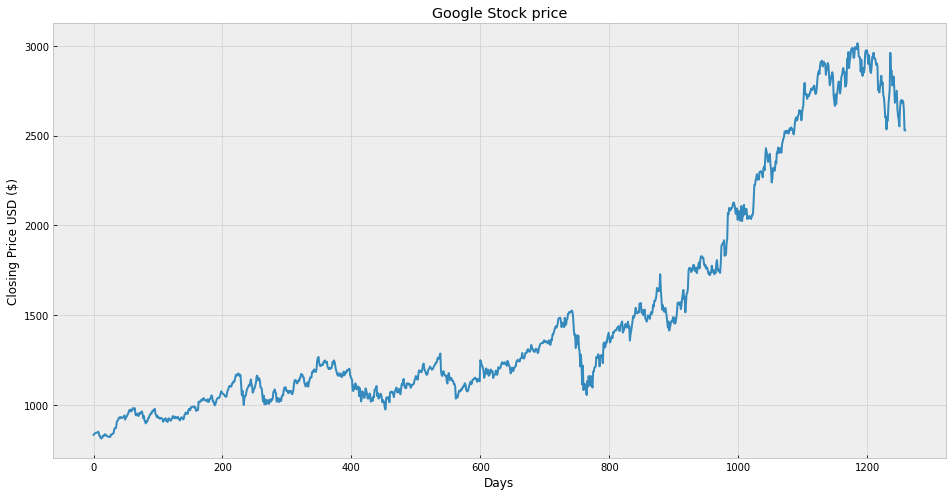

In [47]:
plt.figure(figsize=(16,8))
plt.title('Google Stock price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [34]:
df = df[['Close']]
df.head(4)

,Close
0,835.369995
1,838.679993
2,843.250000
3,845.539978


In [35]:

future_days = 50
#Create aivariable to predict 'x' days out into the future
df[['Prediction']] = df[['Close']].shift(-future_days)
#Create a new column (target) shifted 'x' units/days up
df.head()

,Close,Prediction
0,835.369995,930.239990
1,838.679993,934.010010
2,843.250000,941.859985
3,845.539978,948.820007
4,845.619995,954.960022


In [36]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 835.369995]
 [ 838.679993]
 [ 843.25    ]
 ...
 [2884.409912]
 [2938.97998 ]
 [2942.850098]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [37]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 930.23999   934.01001   941.859985 ... 2642.439941 2529.290039
 2529.290039]


In [38]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr= LinearRegression().fit(x_train, y_train)

#TEST SVM
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

#TEST POLY
poly_svr = SVR(kernel='poly', C=1.0, degree=1)
poly_svr.fit(x_train, y_train)



SVR(degree=1, kernel='poly')

In [40]:
#TEST CONFINDENCE SCORES FOR ALL 4 MODELS

linearRegression_confidenceScore = lr.score(x_test, y_test)
dt_confidenceScore = tree.score(x_test, y_test)
rbf_confidenceScore = svr_rbf.score(x_test, y_test)
poly_confidenceScore = poly_svr.score(x_test, y_test)
print("Linear Regression confidence: ", linearRegression_confidenceScore)
print("Decision Tree confidence: ", dt_confidenceScore)
print("Radial Basis function confidence: ", rbf_confidenceScore)
print("Polynomial confidence: ", poly_confidenceScore)

Linear Regression confidence:  0.940934720357275
Decision Tree confidence:  0.9435436067699113
Radial Basis function confidence:  0.8462372861897581
Polynomial confidence:  0.902470384503823


In [41]:
#Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[2828.23999 ],
       [2833.5     ],
       [2859.209961],
       [2876.439941],
       [2848.300049],
       [2855.610107],
       [2772.5     ],
       [2775.459961],
       [2793.439941],
       [2928.550049],
       [2922.580078],
       [2965.409912],
       [2875.47998 ],
       [2917.26001 ],
       [2935.800049],
       [2973.659912],
       [2984.820068],
       [2987.030029],
       [2984.969971],
       [2932.52002 ],
       [2934.959961],
       [2992.909912],
       [2987.76001 ],
       [2981.52002 ],
       [2981.23999 ],
       [3014.179932],
       [2999.050049],
       [2941.570068],
       [2935.139893],
       [2934.350098],
       [2856.120117],
       [2922.280029],
       [2849.040039],
       [2832.360107],
       [2875.530029],
       [2850.409912],
       [2875.929932],
       [2960.72998 ],
       [2974.409912],
       [2962.120117],
       [2973.5     ],
       [2934.090088],
       [2899.409912],
       [2947.370117],
       [2896.77002 ],
       [28

In [42]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

#TEST SVM
svm_prediction = svr_rbf.predict(x_future)
print(svm_prediction)

#TEST POLY
poly_prediction = poly_svr.predict(x_future)
print(svm_prediction)

[2961.280029 2682.600098 2930.090088 2920.050049 2893.590088 2901.48999
 2888.330078 2753.070068 2751.02002  2778.76001  2771.47998  2800.350098
 2832.959961 2782.620117 2795.72998  2725.810059 2601.840088 2582.419922
 2601.840088 2778.76001  2534.709961 2584.800049 2582.419922 2665.790039
 2713.969971 2757.570068 2584.800049 2795.72998  2860.320068 2778.76001
 2695.030029 2771.47998  2772.050049 2682.600098 2706.       2772.050049
 2749.75     2646.169922 2609.350098 2588.050049 2725.810059 2778.76001
 3014.179932 2697.820068 2683.360107 2695.030029 2935.800049 2642.439941
 2795.72998  2697.820068]
[2964.09270989 2969.56959469 2996.33959984 3014.27998696 2984.97986264
 2992.59132071 2906.05451142 2909.1365142  2927.85782448 3068.53864022
 3062.3225221  3106.91826756 3013.28044593 3056.78310305 3076.08756405
 3115.50842226 3127.12872124 3129.42980086 3127.28480487 3072.67229659
 3075.21283849 3135.55211657 3130.18987962 3123.69260938 3123.4010335
 3157.69911807 3141.94541678 3082.09548

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


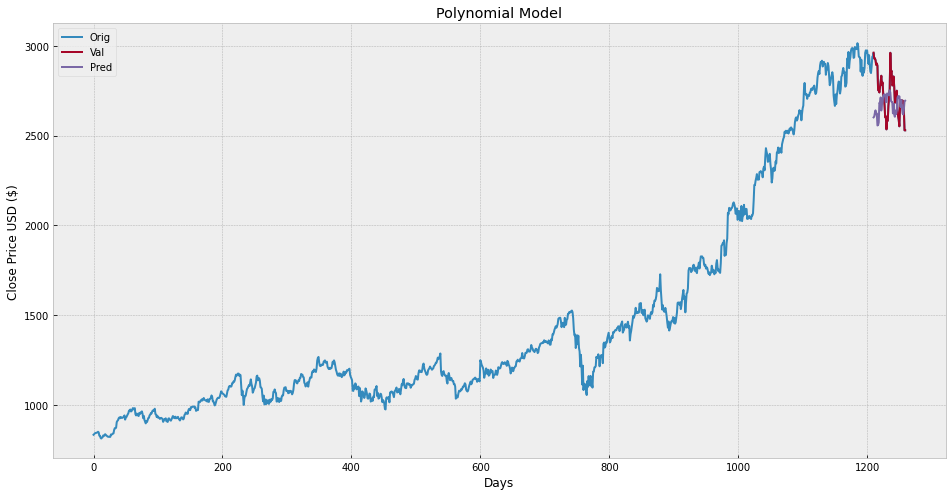

In [43]:
predictions = poly_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Polynomial Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


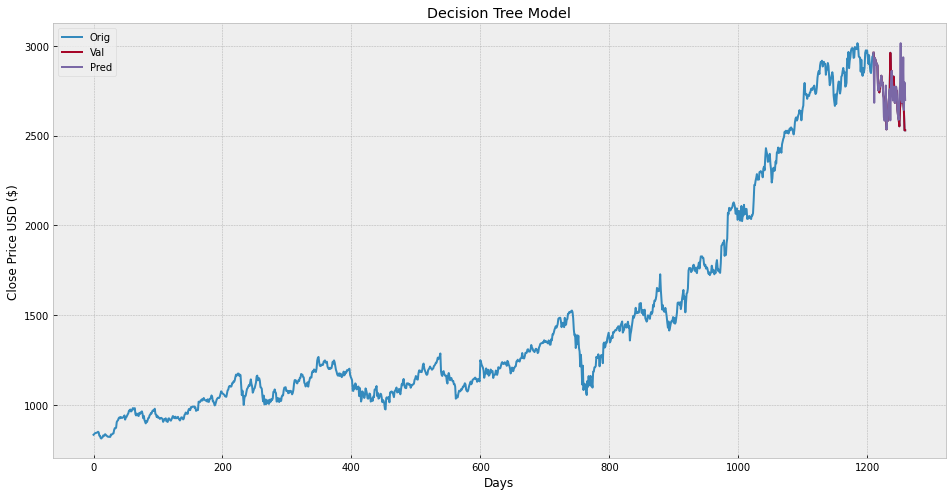

In [44]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


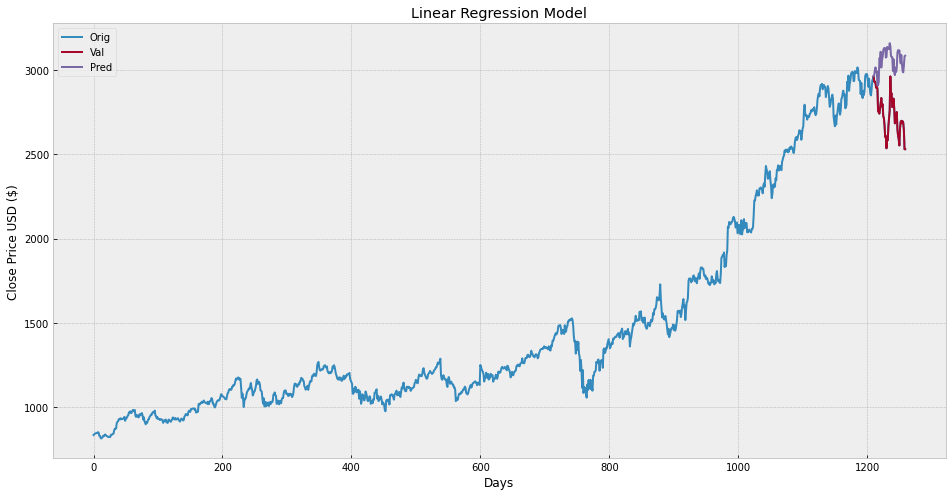

In [45]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


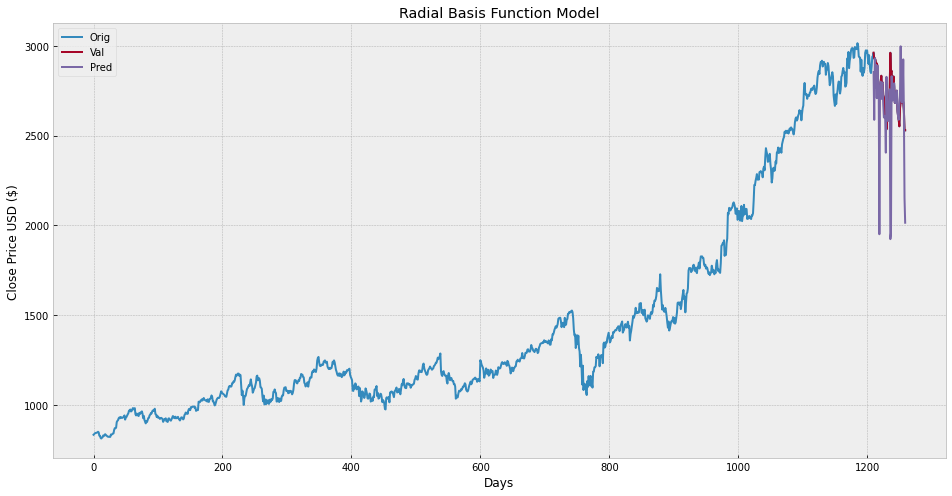

In [46]:
predictions = svm_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Radial Basis Function Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()